In [ ]:
# write Python Code that produces scripts for Drawingautomaton

<img src="/files/images/Zeichungsautomat.svg">

<img src="../../images/Zeichungsautomat.svg">

### Endliche Automaten  
Zuviele Typen von Automaten.
Ganz Primitiver Computer, ohne moeglichkeit zum Programmieren oder Speichern.

Mathematisches Modell.
Zustaende, 
Liest zeichen, abhaengin vomaktuellen zustand und gelesenem Zeichen geht er in
neuen Zustand uber und gibt ein Zeichen aus.


Gib ganz primitives Beispiel.

Automat in Umgebung, Interpretiere AUsgaben als Befehle, die der
AUtomat an ein ineligeners geraet in seiner Umgebung weitergeben kann.

g-Code:
ev. example of g-Code




3 Typen:
- Nur etwas steuern
- wort akzeptieren
- Output produzieren, transducer
- mit Keller/Stack (Parser)
  
- Robotik
- abstraction for programming
- pattern matching
- parsing

Das Lesen eines Symbols des Inputs wird als Eintreffen eines **Events** aufgefasst, das Schreiben eines Ausgabezeichens als Ausf&uuml;hren  einer **Aktion**.

Wir interpretieren die Symbole des Inputalphabets als **Events**, welche
vom **Environment** (der Umgebung in welcher der Automat operiert) an den Automaten gesendet werden. Symbole des Outputalphabets interpretieren wir als **Actions**, welche
ans Environment gesendet und von diesem ausgef&uuml;hrt werden.

### Zeichungsautomat
Automat: mit einfachen Befehlen steuerbare Machine.
Liest der Reihe nach Zeichen einer Eingabe.
Abh&auml;nig von aktuellen Zustand und gelesenen Zeichen
&auml;ndert der AUtomat seinen Zustand und gibt ein Zeichen aus.
Wir nehmen an, der Automat operiere in einer Umgebung, in welchem
die ausgegebenen Zeichen als Aktionen interpretiert werden.



3d-Drucker als Beispiel eines Automaten.
Orientieren uns an einem 3d-Drucker.
Hat Programm, das Skript fuer 3d_Ducher (AUtomat) erstellt.
Von CAD-3d-Model
(Simulation) eines Zeichnungsautomaten.






### Deterministischer endlicher Automat (DEA)
Ein **DEA** hat endlich viele **Zust&auml;nde** $\{s_1,\ldots,s_n\}$
mit einem ausgezeichneten **Anfangszustand**. 
Der Automat hat ein **Eingabealphabet**, eine endliche Menge von Symbolen, die er erkennt, und
ein **Ausgabealphabet**, eine endliche Menge von Symbolen die er ausgeben kann.
Wir nehmen an, der Automat operiere in einer Umgebung, in welchem
die ausgegebenen Zeichen als Aktionen interpretiert werden. 

Eine **Transitionstabelle** legt das Verhalten des Automaten fest.
Der Automat startet im Anfangszustand und liest der Reihe nach die Zeichen  eines endlichen Eingabewortes.


Abh&auml;ngig vom aktuellen Zustand und gelesenen Zeichen geht der Automat in einen neuen Zustand &uuml;ber und gibt ein Zeichen aus.
Dieser Zustandswechsel ist in der Transitionstabelle definiert.

> (Zustand, gelesenes Zeichen) -> (neuer Zustand, auszugebendes Zeichen)

**Beispiel**:  
Wir betrachten einen Zeichnungsautomaten.
Der Automat liest fortlaufend die Zeichen des Inputs, welche ihn anweisen eine Zeichnung zu erstellen.  
Die Idee ist, dass wir mittels des Automaten einen Schreibkopf steuern k&ouml;nnen.
Ist der Schreibkopf auf dem Papier (Pen down) so resultiert eine Positions&auml;derung in einer Linie auf dem Blatt,
ist der Schreibkopf &uuml;ber dem Papier (Pen up), wird nur die Position ge&auml;ndert.  

Aktionszeichen und Befehlszeichen.

Es gibt Anweisungen, die nur ein Zeichen lang sind und sofort umgesetzt werden, wie z.B. $\texttt{u}$ f&uuml;r Pen up.

Andere Anweisungen erfordern noch weitere Argumente.





mit zwei Zust&auml;den $0$ (initialer Zustand) und $1$.  




Folgende Transitionstabelle beschreibt den den Automaten.


| aktueller Zustand   | gelesenes Zeichen | neuer Zustand | Aktion
|----------|:-------------:|:------:|------:|
| $0$ | $u$ | $0$ | Pen up|
| $0$ | $d$ | $0$ | Pen down|
| $0$ | $E$ | $0$ | Clear Screen|
| $0$ | $l$ | $1$ | Kopiere gelesesens Zeichen ins Befehlsbuffer|
| $0$ | $f$ | $1$ | dito |
| $0$ | $s$ | $1$ | dito |
| $0$ | $g$ | $1$ | dito |
| $0$ | $G$ | $1$ | dito |
| $0$ | $r$ | $1$ | dito |
| $0$ | $R$ | $1$ | dito |
| $0$ | $c$ | $1$ | dito |
| $0$ | $C$ | $1$ | dito |
| $0$ | $e$ | $1$ | dito |
| $1$ | $0$ | $1$ | dito |
| $1$ | $\vdots$ | $1$ | dito |
| $1$ | $z$ | $1$ | dito |
| $1$ | $;$ | $0$ |Befehlsbuffer ausf&uuml;hren und l&ouml;schen|


### Graphische Darstellung eines Automaten als Transitionsgraph  
Oft verwendet man zur Beschreibung eines Automaten einen Transitionsgraphen,
der den Zustandswechsel beim Lesen eines Zeichens anzeigt sowie die Aktion, die dabei get&auml;tigt wird.

- Knoten/Kreise mit dem Zustandsnamen repr&auml;sentieren Zust&auml;nde,
  der Anfangszustand ist der Knoten mit einer eingehenden Kante ohne Quelle.
- mit $\texttt{s}/\texttt{a}$ beschriftete Kanten zw. Kreisen
  beschreiben beim Lesen welchen Zeichens $\texttt{s}$ dieser &Uuml;bergang geschieht und welche Aktion $\texttt{a}$ get&auml;tigt wird.

### Zeichnungsautomat
  
Er hat 2 Zust&auml;nde, $0$ und $1$, der initiale Zustand ist $0$, markiert mit dem eingehende Pfeil.  
- Liest der Automat im Zustand $0$ eines der **Aktionszeichen** $\texttt{u}$ (Pen up), $\texttt{d}$ (Pen down), $\texttt{E}$ (Erase),
  wird die entsprechende Aktion ausgef&uuml;hrt. Der Automat bleibt im Zustand $0$.
- Liest der Automat im Zustand $0$ eines der **Befehlszeichen**
  - $\texttt{l}$ `set_linewidth(width)`,  
  - $\texttt{f}$ `set_fillstyle(color)`,  
  - $\texttt{s}$ `set_strokestyle(color)`,  
  - $\texttt{g}$ `goto(x, y)`,  
  - $\texttt{G}$ `shift(dx, dy)`,  
  - $\texttt{r}$ `stroke_rectangle(width, height)`,  
  - $\texttt{R}$ `fill_rectangle(width, height)`,  
  - $\texttt{c}$ `stroke_circle(radius)`,  
  - $\texttt{C}$ `fill_circle(radius)`,  
  - $\texttt{e}$ `clear_rect(width, height)`,  

  wird dieses Zeichen ins Befehlsbuffer kopiert. Der Automat wechselt in den Zustand $1$.
- Liest der Automat im Zustand $1$ ein Symbol ungleich `;` wird das Zeichen ins
  Befehlsbuffer kopiert. Der Automat bleibt im Zustand $1$.
- Liest der Automat im Zustand $1$ das Symbol `;` wird der Befehl im Befehlsbuffer ausgef&uuml;hrt.
  Das Befehlsbuffer wird gel&ouml;scht und der Automat wechselt in den Zustand $0$.
- In allen anderen F&auml;llen wird ein Fehler ausgel&ouml;st.


In [1]:
%load_ext tikzmagic

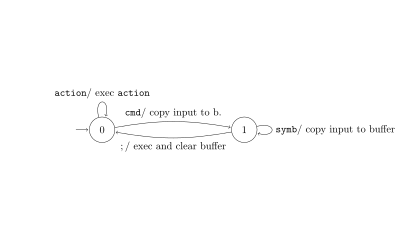

In [4]:
%%tikz -f svg -l automata,positioning,tikzmark
\begin{tikzpicture}[shorten >=1pt, node distance=4cm, bend angle=10, baseline=0pt]
 
  \node[state,initial, initial text=]  (q_0) {$0$};
  \node[state]          (q_1) [right=of q_0] {$1$};
  \draw (12cm, 0);

  \path[->] (q_0) edge[bend left]  node[above] {$\mathtt{cmd}/$ copy input to b.} (q_1)
            (q_1) edge[bend left]  node[below] {$;/$ exec and clear buffer} (q_0)
            (q_0) edge[loop above] node[above] {$\mathtt{action}/$ exec $\mathtt{action}$} ()
            (q_1) edge[loop right] node[right] {$\mathtt{symb}/$ copy input to buffer} ();
\end{tikzpicture}